## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [62]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [63]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [64]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

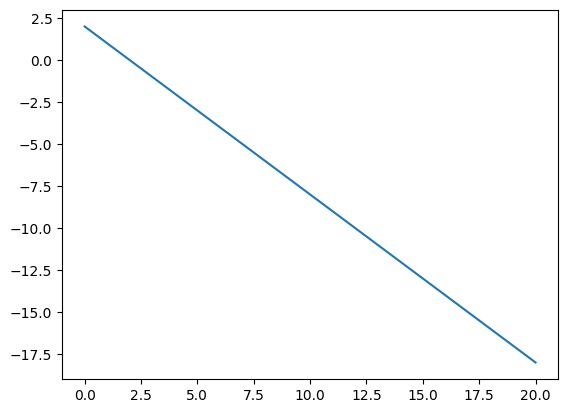

In [65]:
plt.plot(X , y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [66]:
def linear_regression(X , y , alpha , iterations):
    m = len(y)
    lr = alpha
    x_b = np.c_[np.ones((len(X),1)) , X]
    theta = np.zeros((x_b.shape[1] , 1))
    y = y.reshape(-1,1)
    total_cost = []
    theta_history = []
    theta_history0 = []
    theta_history1 = []
    for i in range(iterations):
        y_pred = x_b.dot(theta)
        assert y_pred.shape == y.shape , "shape of y_pred and y are not the same"

        error = y_pred - y
        cost = (1/(2*m)) * np.sum(error**2)
        gradients = (1/m) * x_b.T.dot(error)
        
        if np.linalg.norm(gradients) < 1e-2:
            break

        theta = theta - lr * gradients
        total_cost.append(cost)
        theta_history.append(theta.copy())
        theta_history0.append(theta[0][0])
        theta_history1.append(theta[1][0])
        
        print(f"epoch {i+1}\nCost:{cost}\nTheta0: {theta[0][0]} \nTheta1: {theta[1][0]}\nGradient:{gradients}\nGradient Norm: {np.linalg.norm(gradients)}\n")

    return theta , y_pred , total_cost , theta_history0 , theta_history1 , theta_history

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [67]:
theta , y_pred , total_cost , theta_history0 , theta_history1 , theta_history = linear_regression(X , y , alpha=0.0005 , iterations = 300)

epoch 1
Cost:49.34693877551021
Theta0: -0.003999999999999999 
Theta1: -0.05734693877551021
Gradient:[[  8.        ]
 [114.69387755]]
Gradient Norm: 114.97254258164628

epoch 2
Cost:42.96137982976481
Theta0: -0.007711265306122449 
Theta1: -0.11081173677634319
Gradient:[[  7.42253061]
 [106.929596  ]]
Gradient Norm: 107.18690433895928

epoch 3
Cost:37.41136489517327
Theta0: -0.011153350989587672 
Theta1: -0.16065728797303844
Gradient:[[ 6.88417137]
 [99.69110239]]
Gradient Norm: 99.92851300714294

epoch 4
Cost:32.5875614778742
Theta0: -0.014344487874227686 
Theta1: -0.20712868345664098
Gradient:[[ 6.38227377]
 [92.94279097]]
Gradient Norm: 93.16166492307669

epoch 5
Cost:28.394943445570494
Theta0: -0.01730167221300737 
Theta1: -0.2504544170293736
Gradient:[[ 5.91436868]
 [86.65146715]]
Gradient Norm: 86.85307429973763

epoch 6
Cost:24.750919013327465
Theta0: -0.020040749291753996 
Theta1: -0.29084750915408547
Gradient:[[ 5.47815416]
 [80.78618425]]
Gradient Norm: 80.9717094950767

epoch 

In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(y , theta[0][0] + theta[1][0]*X)
r2

0.9707406024215084

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [69]:
def plot_losses(total_cost , n):
    plt.plot(total_cost[:n] , "o-")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost vs Iterations")
    plt.show()

def plot_theta0_loss(theta_history0 , total_cost):
    plt.plot(theta_history0 , total_cost , "o-")
    plt.xlabel("Iterations")
    plt.ylabel("Theta0")
    plt.title("Theta0 vs Iterations")
    plt.show()

def plot_theta1_loss(theta_history1 , total_cost):
    plt.plot(theta_history1 , total_cost , "o-")
    plt.xlabel("Iterations")
    plt.ylabel("theta1")
    plt.title("Theta1 vs Iterations")
    plt.show()

def plot_all_lines(X , y , theta_history):
    plt.scatter(X , y , color="blue")
    x_b = np.c_[np.ones((len(X),1)) , X]
    for i in range(len(theta_history)):
        theta = theta_history[i]
        y_pred = x_b.dot(theta)
        plt.plot(X , y_pred , color="red" , alpha=0.1)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Regression Lines over Iterations")
    plt.show()

def plot_best_fitline(X , y , theta):
    plt.scatter(X , y , color="blue")
    x_b = np.c_[np.ones((len(X),1)) , X]
    y_pred = x_b.dot(theta)
    plt.plot(X , y_pred , color="red" )
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Best Fit Line")
    plt.show()

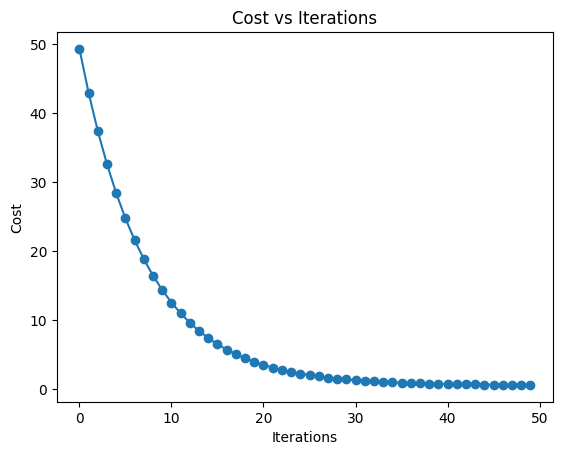

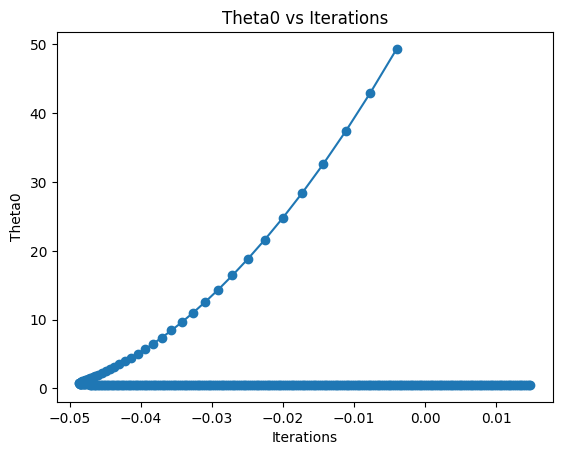

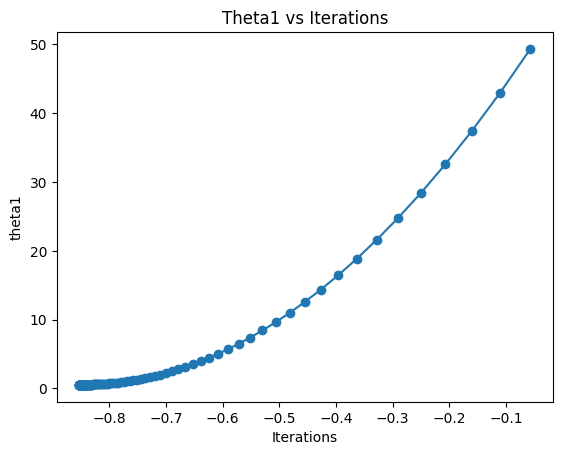

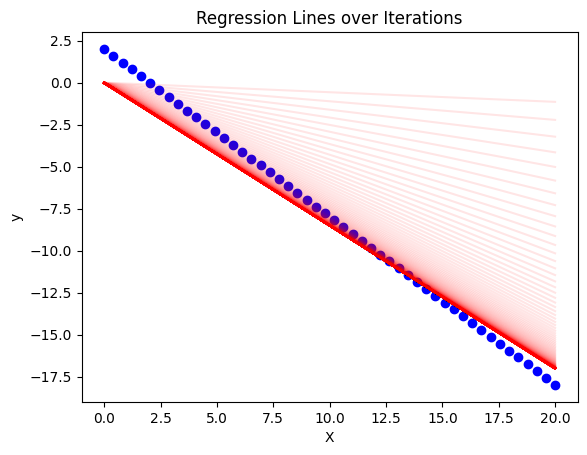

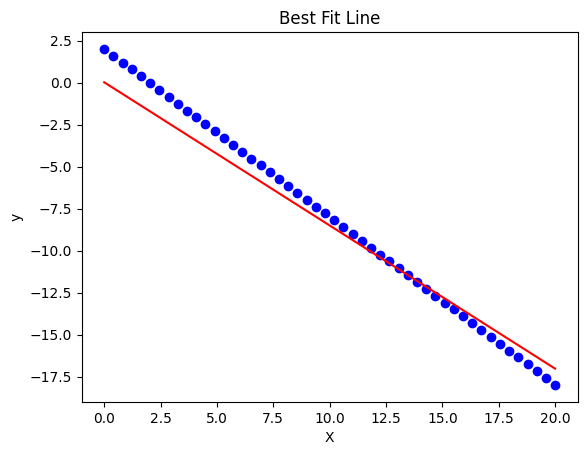

In [70]:
plot_losses(total_cost , n=50)
plot_theta0_loss(theta_history0 , total_cost)
plot_theta1_loss(theta_history1 , total_cost)
plot_all_lines(X , y , theta_history=theta_history)
plot_best_fitline(X , y , theta)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [71]:
def momentum_based_GD(X , y , alpha , iterations , gamma):
    m = len(y)
    lr = alpha
    x_b = np.c_[np.ones((len(X),1)) , X]
    theta = np.zeros((x_b.shape[1] , 1))
    velocity = np.zeros_like(theta)
    y = y.reshape(-1,1)
    total_cost = []
    theta_history = []
    theta_history0 = []
    theta_history1 = []
    for i in range(iterations):
        y_pred = x_b.dot(theta)
        assert y_pred.shape == y.shape , "shape of y_pred and y are not the same"

        error = y_pred - y
        cost = (1/(2*m)) * np.sum(error**2)
        gradients = (1/m) * x_b.T.dot(error)
        
        if np.linalg.norm(gradients) < 1e-2:
            print(f"converged at epoch {i+1}")
            break

        velocity = gamma * velocity + lr * gradients
        theta = theta - velocity
        total_cost.append(cost)
        theta_history.append(theta.copy())
        theta_history0.append(theta[0][0])
        theta_history1.append(theta[1][0])
        
        print(f"epoch {i+1}\nCost:{cost}\nTheta0: {theta[0][0]} \nTheta1: {theta[1][0]}\nGradient:{gradients}\nGradient Norm: {np.linalg.norm(gradients)}\n")

    return theta , y_pred , total_cost , theta_history0 , theta_history1 , theta_history

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [74]:
theta , y_pred , total_cost , theta_history0 , theta_history1 , theta_history = momentum_based_GD(X , y , alpha=0.0005 , iterations = 300 , gamma=0.5)

epoch 1
Cost:49.34693877551021
Theta0: -0.003999999999999999 
Theta1: -0.05734693877551021
Gradient:[[  8.        ]
 [114.69387755]]
Gradient Norm: 114.97254258164628

epoch 2
Cost:42.96137982976481
Theta0: -0.009711265306122447 
Theta1: -0.13948520616409832
Gradient:[[  7.42253061]
 [106.929596  ]]
Gradient Norm: 107.18690433895928

epoch 3
Cost:34.59505273675567
Theta0: -0.015864616295710118 
Theta1: -0.22845882066774903
Gradient:[[ 6.59543667]
 [95.80896162]]
Gradient Norm: 96.03570643965882

epoch 4
Cost:26.56863171962995
Theta0: -0.021791065379017354 
Theta1: -0.3148272414053699
Gradient:[[ 5.69954718]
 [83.76322697]]
Gradient Norm: 83.95691175071546

epoch 5
Cost:19.807866921908868
Theta0: -0.027169258180954614 
Theta1: -0.39404678427100526
Gradient:[[ 4.82993652]
 [72.07066499]]
Gradient Norm: 72.23232683099451

epoch 6
Cost:14.499412105758672
Theta0: -0.03187453603147774 
Theta1: -0.4643298035334423
Gradient:[[ 4.0323629 ]
 [61.34649566]]
Gradient Norm: 61.47887832596742

epoch

In [75]:
r2 = r2_score(y , theta[0] + theta[1]*X)
r2

0.972892479332971

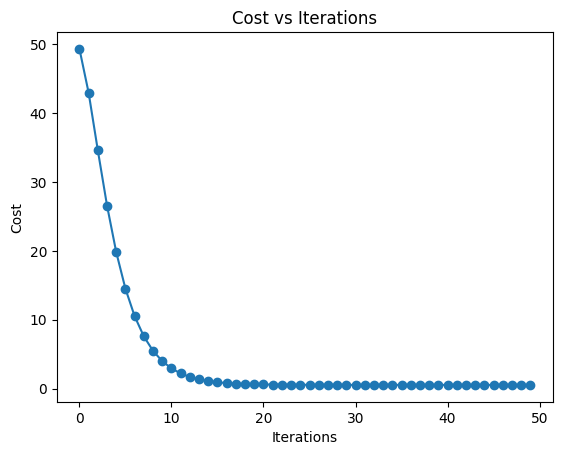

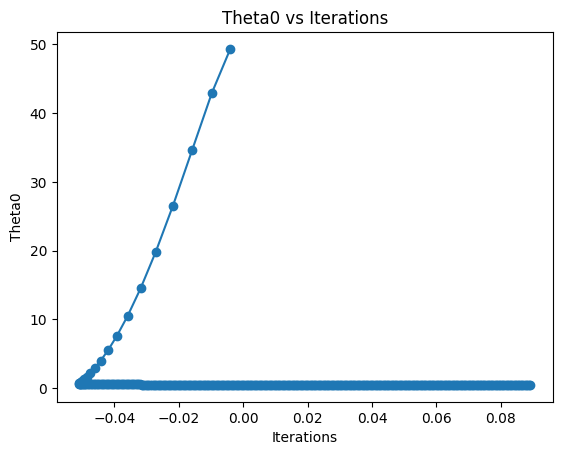

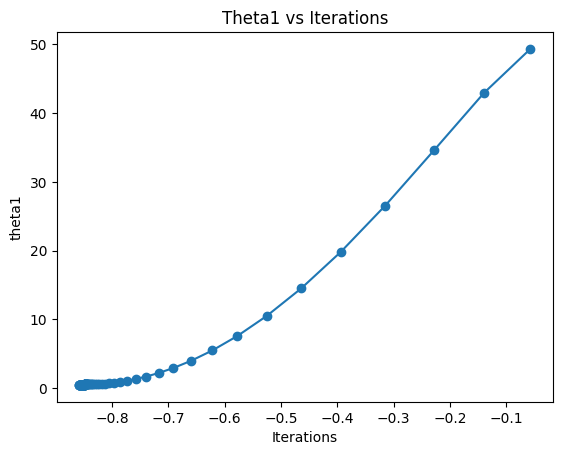

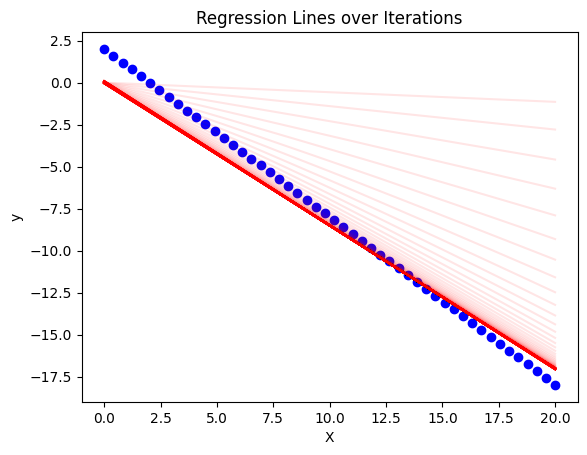

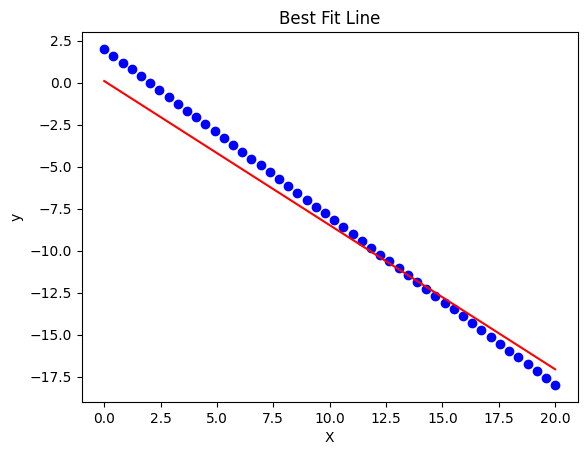

In [76]:
plot_losses(total_cost , n=50)
plot_theta0_loss(theta_history0 , total_cost)
plot_theta1_loss(theta_history1 , total_cost)
plot_all_lines(X , y , theta_history=theta_history)
plot_best_fitline(X , y , theta)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [77]:
theta , y_pred , total_cost , theta_history0 , theta_history1 , theta_history = momentum_based_GD(X , y , alpha=0.0005 , iterations = 300 , gamma=0)    

epoch 1
Cost:49.34693877551021
Theta0: -0.003999999999999999 
Theta1: -0.05734693877551021
Gradient:[[  8.        ]
 [114.69387755]]
Gradient Norm: 114.97254258164628

epoch 2
Cost:42.96137982976481
Theta0: -0.007711265306122449 
Theta1: -0.11081173677634319
Gradient:[[  7.42253061]
 [106.929596  ]]
Gradient Norm: 107.18690433895928

epoch 3
Cost:37.41136489517327
Theta0: -0.011153350989587672 
Theta1: -0.16065728797303844
Gradient:[[ 6.88417137]
 [99.69110239]]
Gradient Norm: 99.92851300714294

epoch 4
Cost:32.5875614778742
Theta0: -0.014344487874227686 
Theta1: -0.20712868345664098
Gradient:[[ 6.38227377]
 [92.94279097]]
Gradient Norm: 93.16166492307669

epoch 5
Cost:28.394943445570494
Theta0: -0.01730167221300737 
Theta1: -0.2504544170293736
Gradient:[[ 5.91436868]
 [86.65146715]]
Gradient Norm: 86.85307429973763

epoch 6
Cost:24.750919013327465
Theta0: -0.020040749291753996 
Theta1: -0.29084750915408547
Gradient:[[ 5.47815416]
 [80.78618425]]
Gradient Norm: 80.9717094950767

epoch 

In [78]:
r2 = r2_score(y , theta[0] + theta[1]*X)
r2

0.9707406024215084

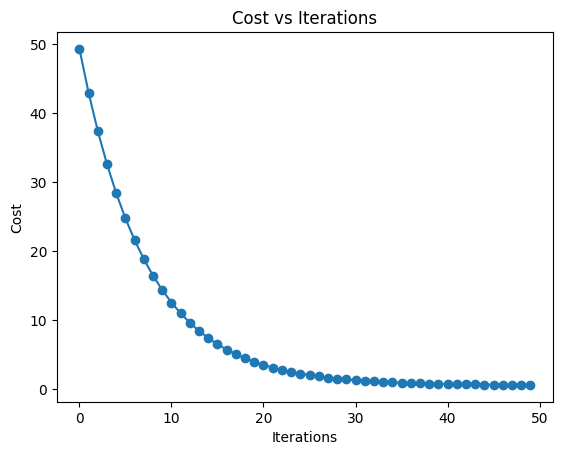

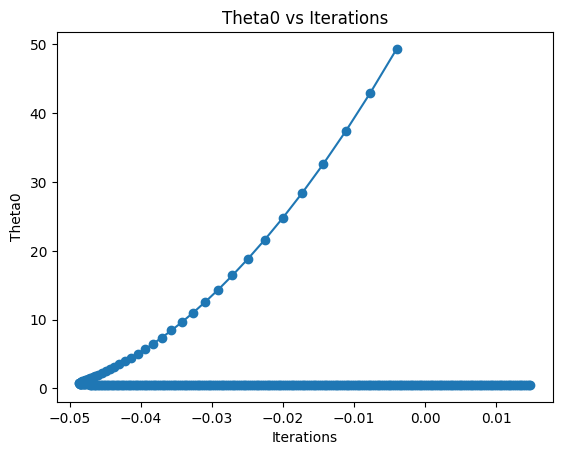

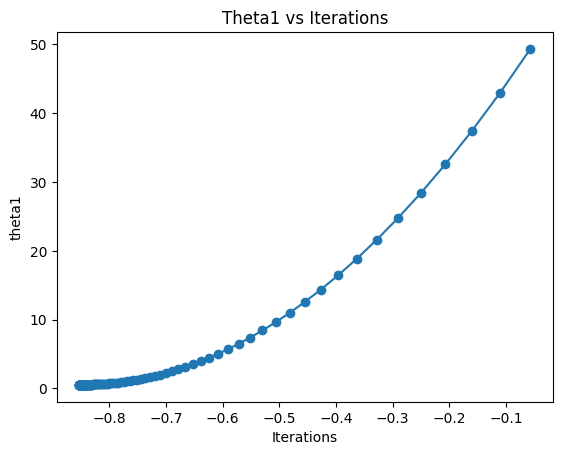

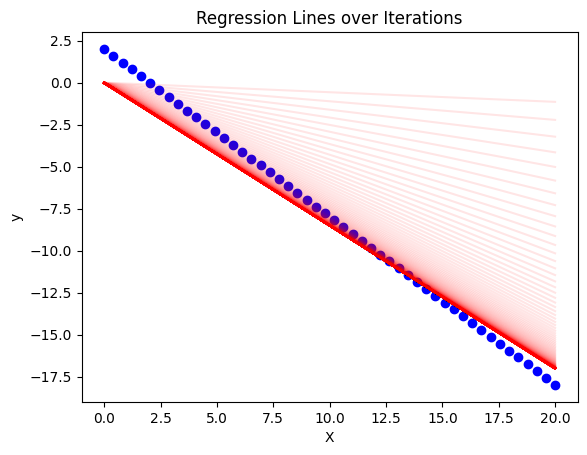

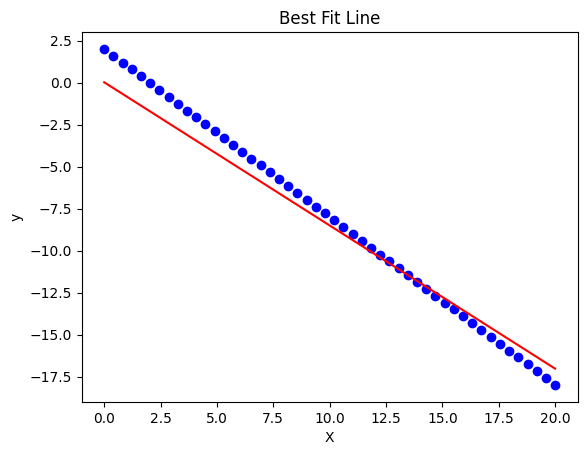

In [79]:
plot_losses(total_cost , n=50)
plot_theta0_loss(theta_history0 , total_cost)
plot_theta1_loss(theta_history1 , total_cost)
plot_all_lines(X , y , theta_history=theta_history)
plot_best_fitline(X , y , theta)

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [80]:
theta , y_pred , total_cost , theta_history0 , theta_history1 , theta_history = momentum_based_GD(X , y , alpha=0.0005 , iterations = 300 , gamma=0.9)

epoch 1
Cost:49.34693877551021
Theta0: -0.003999999999999999 
Theta1: -0.05734693877551021
Gradient:[[  8.        ]
 [114.69387755]]
Gradient Norm: 114.97254258164628

epoch 2
Cost:42.96137982976481
Theta0: -0.011311265306122448 
Theta1: -0.1624239816743024
Gradient:[[  7.42253061]
 [106.929596  ]]
Gradient Norm: 107.18690433895928

epoch 3
Cost:32.422565188137185
Theta0: -0.02107362854060808 
Theta1: -0.30334494478270113
Gradient:[[ 6.36444892]
 [92.703249  ]]
Gradient Norm: 92.92146460853121

epoch 4
Cost:20.647830716719692
Theta0: -0.03233249391346134 
Theta1: -0.46698602878892603
Gradient:[[ 4.94547692]
 [73.62443442]]
Gradient Norm: 73.79034547469081

epoch 5
Cost:10.366099070733151
Theta0: -0.04411437635812791 
Theta1: -0.6399982012106049
Gradient:[[ 3.29780722]
 [51.47039363]]
Gradient Norm: 51.575933855793245

epoch 6
Cost:3.4586037560698055
Theta0: -0.05549602236409574 
Theta1: -0.8097336036104682
Gradient:[[ 1.55590361]
 [28.04889444]]
Gradient Norm: 28.092015153672754

epoch

In [81]:
r2 = r2_score(y , theta[0][0] + theta[1][0]*X)
r2

0.9851382538862453

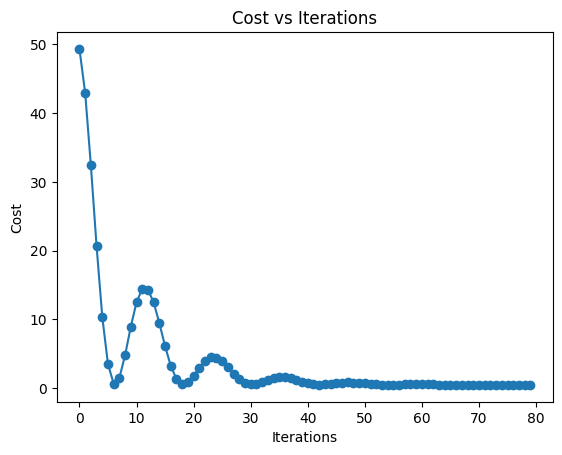

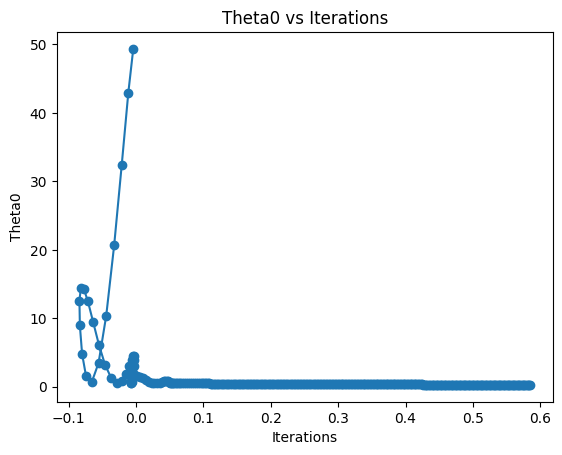

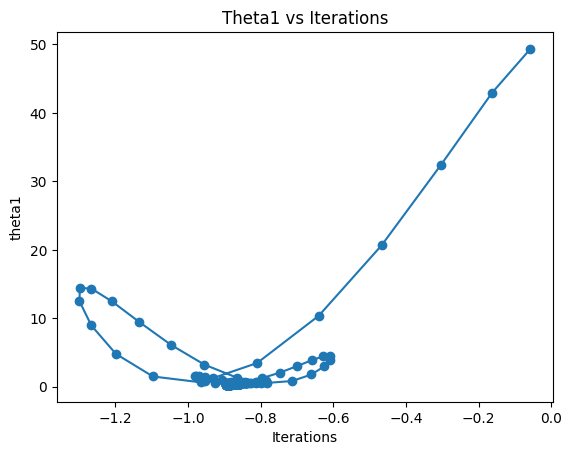

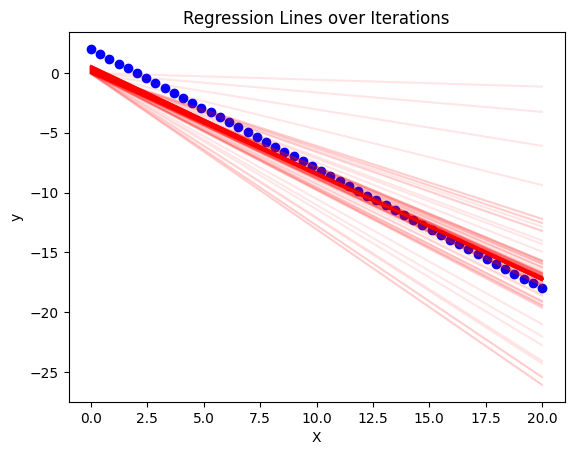

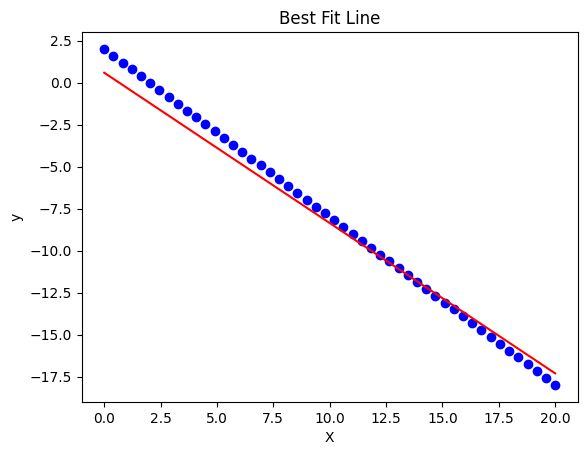

In [82]:
plot_losses(total_cost , n=80)
plot_theta0_loss(theta_history0 , total_cost)
plot_theta1_loss(theta_history1 , total_cost)
plot_all_lines(X , y , theta_history=theta_history)
plot_best_fitline(X , y , theta)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [83]:
theta , y_pred , total_cost , theta_history0 , theta_history1 , theta_history = momentum_based_GD(X , y , alpha=0.0005 , iterations = 300 , gamma=0.89)

epoch 1
Cost:49.34693877551021
Theta0: -0.003999999999999999 
Theta1: -0.05734693877551021
Gradient:[[  8.        ]
 [114.69387755]]
Gradient Norm: 114.97254258164628

epoch 2
Cost:42.96137982976481
Theta0: -0.01127126530612245 
Theta1: -0.1618505122865473
Gradient:[[  7.42253061]
 [106.929596  ]]
Gradient Norm: 107.18690433895928

epoch 3
Cost:32.47600461992306
Theta0: -0.02092780323448563 
Theta1: -0.3012491386186028
Gradient:[[ 6.37022361]
 [92.78089181]]
Gradient Norm: 92.9993206144656

epoch 4
Cost:20.803153317662442
Theta0: -0.032005412396018604 
Theta1: -0.4622680085187478
Gradient:[[ 4.96658081]
 [73.90818493]]
Gradient Norm: 74.07487242298458

epoch 5
Cost:10.611530691937752
Theta0: -0.043537141800991205 
Theta1: -0.6316293791758177
Gradient:[[ 3.3453145 ]
 [52.10915289]]
Gradient Norm: 52.21642408504825

epoch 6
Cost:3.699003347406418
Theta0: -0.054620465504637235 
Theta1: -0.796951946998948
Gradient:[[ 1.64016907]
 [29.18189588]]
Gradient Norm: 29.22795240046181

epoch 7
Cos

In [84]:
r2 = r2_score(y , theta[0][0] + theta[1][0]*X)
r2

0.9840948111189305

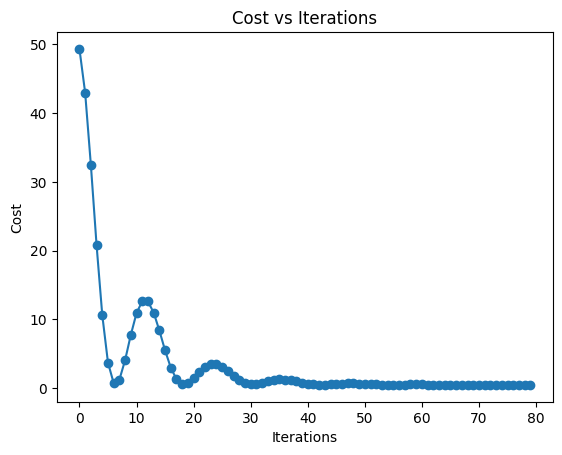

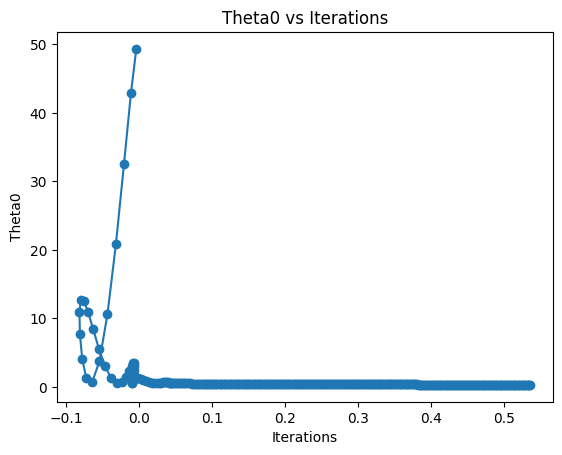

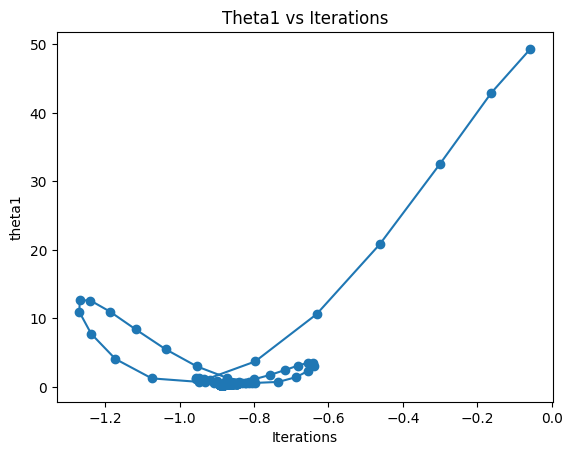

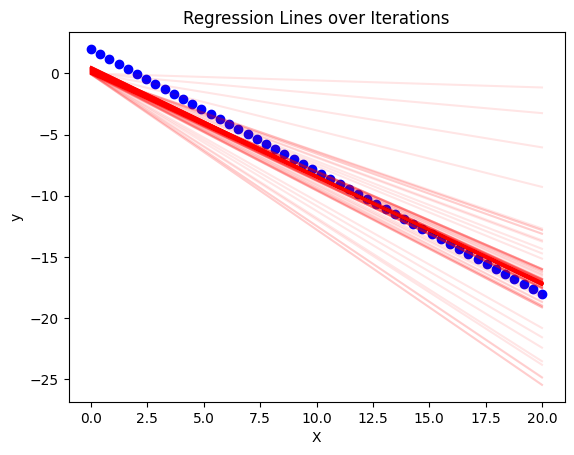

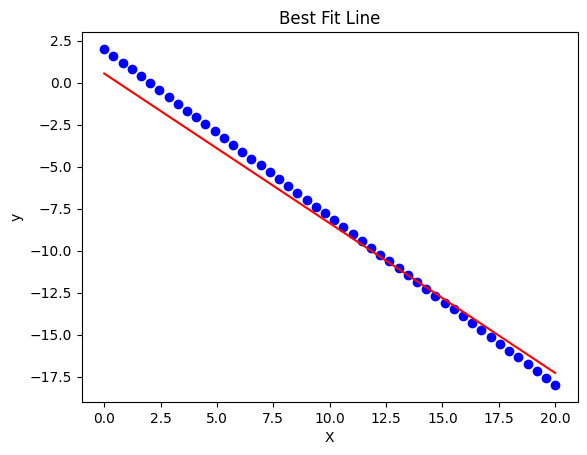

In [85]:
plot_losses(total_cost , n=80)
plot_theta0_loss(theta_history0 , total_cost)
plot_theta1_loss(theta_history1 , total_cost)
plot_all_lines(X , y , theta_history=theta_history)
plot_best_fitline(X , y , theta)

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [86]:
def Nesterove_GD(X , y , alpha , iterations , gamma):
    m = len(y)
    lr = alpha
    x_b = np.c_[np.ones((len(X),1)) , X]
    theta = np.zeros((x_b.shape[1] , 1))
    velocity = np.zeros_like(theta)
    y = y.reshape(-1,1)
    total_cost = []
    theta_history = []
    theta_history0 = []
    theta_history1 = []
    for i in range(iterations):
        look_ahead = theta - gamma*velocity
        y_pred = x_b.dot(look_ahead)
        assert y_pred.shape == y.shape , "shape of y_pred and y are not the same"

        error = y_pred - y
        cost = (1/(2*m)) * np.sum(error**2)
        gradients = (1/m) * x_b.T.dot(error)
        
        if np.linalg.norm(gradients) < 1e-2:
            print(f"converged at epoch {i+1}")
            break

        velocity = gamma * velocity + lr * gradients
        theta = theta - velocity
        total_cost.append(cost)
        theta_history.append(theta.copy())
        theta_history0.append(theta[0][0])
        theta_history1.append(theta[1][0])
        
        print(f"epoch {i+1}\nCost:{cost}\nTheta0: {theta[0][0]} \nTheta1: {theta[1][0]}\nGradient:{gradients}\nGradient Norm: {np.linalg.norm(gradients)}\n")

    return theta , y_pred , total_cost , theta_history0 , theta_history1 , theta_history

In [87]:
theta , y_pred , total_cost , theta_history0 , theta_history1 , theta_history = Nesterove_GD(X , y , alpha=0.0005 , iterations = 300 , gamma=0.9)

epoch 1
Cost:49.34693877551021
Theta0: -0.003999999999999999 
Theta1: -0.05734693877551021
Gradient:[[  8.        ]
 [114.69387755]]
Gradient Norm: 114.97254258164628

epoch 2
Cost:37.59704712464297
Theta0: -0.011051404081632653 
Theta1: -0.1589300549770929
Gradient:[[ 6.90280816]
 [99.94174261]]
Gradient Norm: 100.17984166443891

epoch 3
Cost:24.758436579692262
Theta0: -0.020137194623431904 
Theta1: -0.2907541765964131
Gradient:[[ 5.47905374]
 [80.79863408]]
Gradient Norm: 80.98419165715534

epoch 4
Cost:13.569223870469164
Theta0: -0.030253269477726698 
Theta1: -0.43902969312574514
Gradient:[[ 3.87772673]
 [59.26761414]]
Gradient Norm: 59.394333491733875

epoch 5
Cost:5.670140533059346
Theta0: -0.040475669688157995 
Theta1: -0.5910731903096034
Gradient:[[ 2.23586568]
 [37.19106461]]
Gradient Norm: 37.258212283254686

epoch 6
Cost:1.5094785486722524
Theta0: -0.05001143027373201 
Theta1: -0.7359882297551217
Gradient:[[ 0.67120079]
 [16.15178396]]
Gradient Norm: 16.165724097520705

epoch

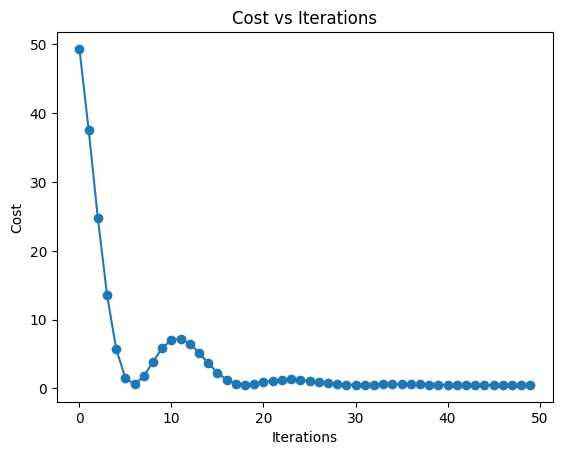

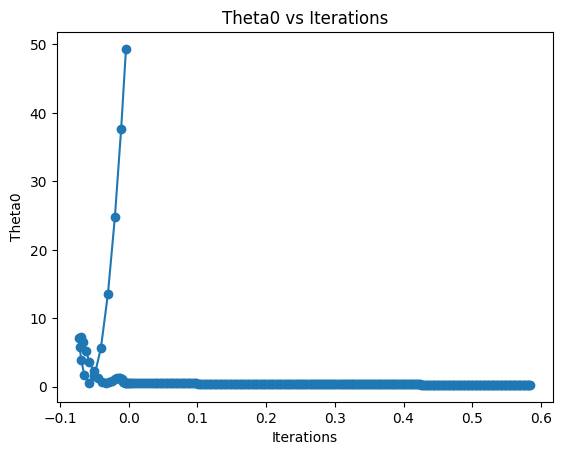

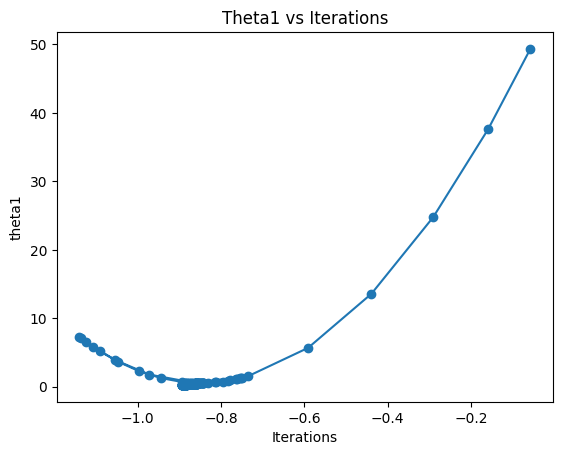

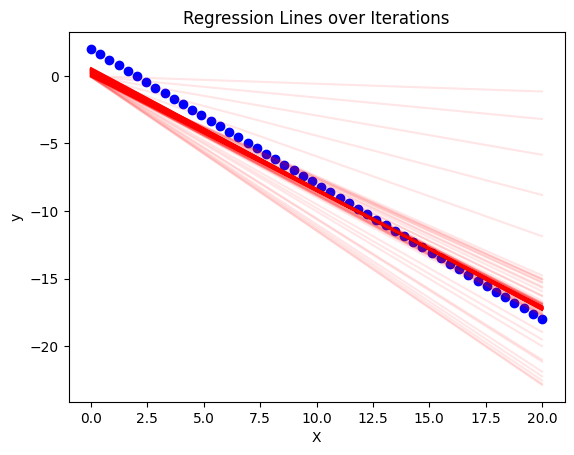

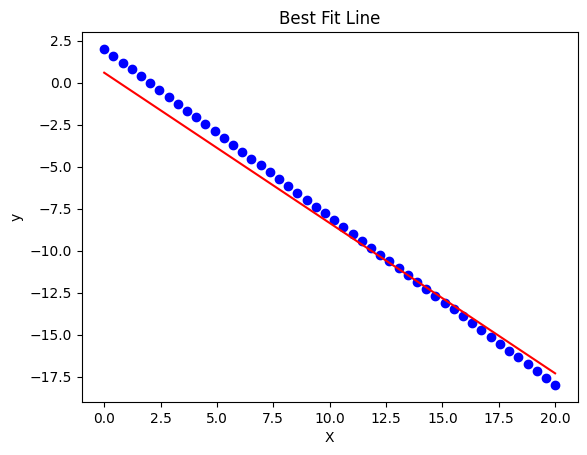

In [88]:
plot_losses(total_cost , n=50)
plot_theta0_loss(theta_history0 , total_cost)
plot_theta1_loss(theta_history1 , total_cost)
plot_all_lines(X , y , theta_history=theta_history)
plot_best_fitline(X , y , theta)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [89]:
theta , y_pred , total_cost , theta_history0 , theta_history1 , theta_history = Nesterove_GD(X , y , alpha=0.0005 , iterations = 300 , gamma=0.89)

epoch 1
Cost:49.34693877551021
Theta0: -0.003999999999999999 
Theta1: -0.05734693877551021
Gradient:[[  8.        ]
 [114.69387755]]
Gradient Norm: 114.97254258164628

epoch 2
Cost:37.65465914529646
Theta0: -0.011014291428571427 
Theta1: -0.15839540699708454
Gradient:[[  6.90858286]
 [100.01938542]]
Gradient Norm: 100.25769784628375

epoch 3
Cost:24.923210182734756
Theta0: -0.02000673957602857 
Theta1: -0.2888650302060583
Gradient:[[ 5.49945755]
 [81.07297298]]
Gradient Norm: 81.25928243442426

epoch 4
Cost:13.833270701693934
Theta0: -0.029971098443741573 
Theta1: -0.43491551858532196
Gradient:[[ 3.92216003]
 [59.86504745]]
Gradient Norm: 59.993393345453015

epoch 5
Cost:5.957009896752606
Theta0: -0.03999545588087381 
Theta1: -0.5840088788903914
Gradient:[[ 2.31215609]
 [38.2168513 ]]
Gradient Norm: 38.286731235393376

epoch 6
Cost:1.6996042202798878
Theta0: -0.04930916558511202 
Theta1: -0.7255366390030409
Gradient:[[ 0.78406317]
 [17.66933888]]
Gradient Norm: 17.68672642384183

epoch

In [90]:
r2 = r2_score(y , theta[0][0] + theta[1][0]*X)
r2

0.9840836337110338

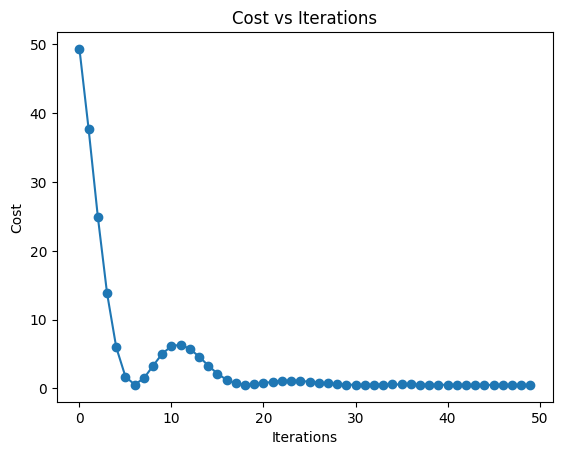

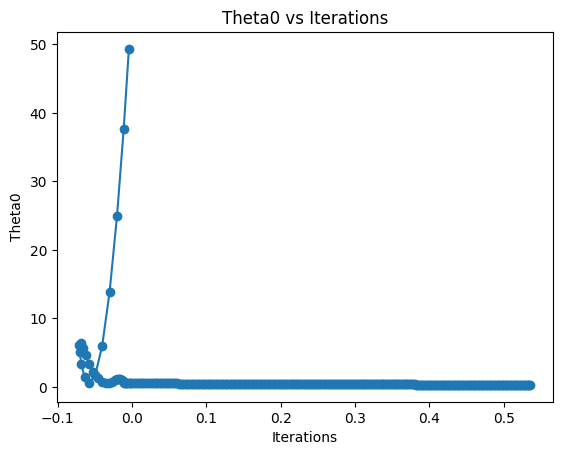

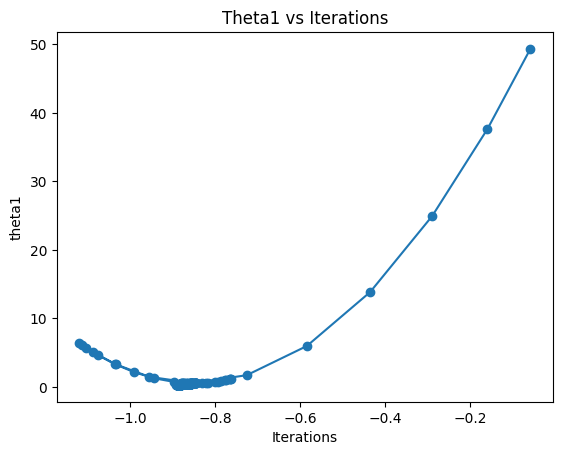

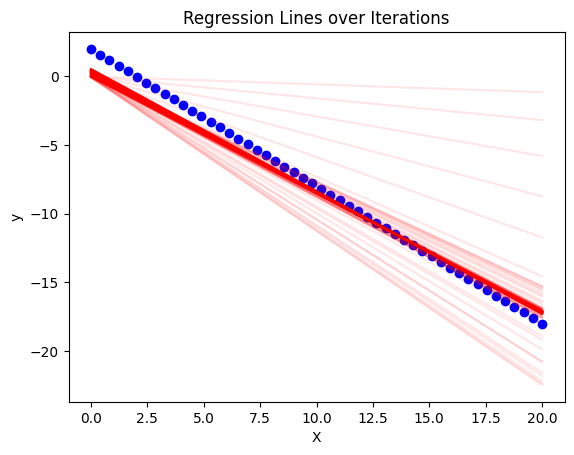

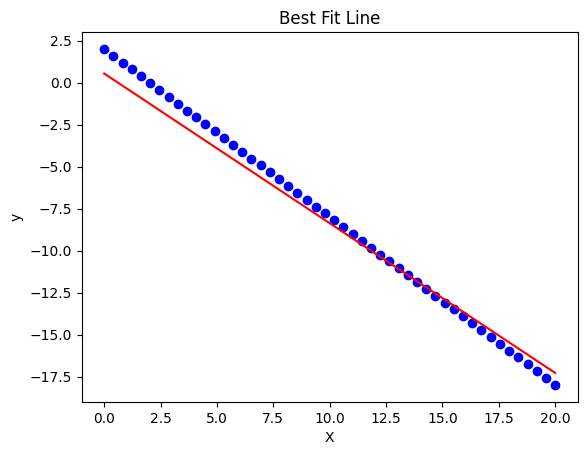

In [91]:
plot_losses(total_cost , n=50)
plot_theta0_loss(theta_history0 , total_cost)
plot_theta1_loss(theta_history1 , total_cost)
plot_all_lines(X , y , theta_history=theta_history)
plot_best_fitline(X , y , theta)